# Load the libraries

In [2]:
from pycaret.classification import *
import numpy as np
import pandas as pd

# Load the data

In [1]:
# Create a path to the data directory
path_data = "../data/final/"

In [9]:
# Load the data
df = pd.read_csv(path_data + "df_final.csv", parse_dates=["time"])

In [10]:
# Split the data into train and test
df_train = df[df["time"] < "2018-01-01"]
df_test = df[df["time"] >= "2018-01-01"]

In [11]:
# Count the number of occurrences for each value in the FireMask column
print("The number of occurrences for each value in the FireMask column for the training data:")
print(df_train["FireMask"].value_counts())
print("The number of occurrences for each value in the FireMask column for the testing data:")
print(df_test["FireMask"].value_counts())

The number of occurrences for each value in the FireMask column for the training data:
1.0    11279
0.0    11279
Name: FireMask, dtype: int64
The number of occurrences for each value in the FireMask column for the testing data:
1.0    3312
0.0    3312
Name: FireMask, dtype: int64


# Setup the environment

In [12]:
# Initialize the setup with pycaret for the training data. Get the all set up for the training data
clf1 = setup(data=df_train, target="FireMask", session_id=123,remove_outliers= True,normalize=True,  silent=True )

,Description,Value
0,session_id,123
1,Target,FireMask
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(22558, 17)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# Compare the models

In [33]:
# Compare the models
best_model = compare_models(n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9739,0.9974,0.9897,0.9594,0.9743,0.9477,0.9482,0.1620
rf,Random Forest Classifier,0.9726,0.9973,0.9905,0.9563,0.9731,0.9452,0.9458,0.2460
xgboost,Extreme Gradient Boosting,0.9683,0.9944,0.9911,0.9480,0.9691,0.9367,0.9376,0.4850
catboost,CatBoost Classifier,0.9657,0.9931,0.9909,0.9435,0.9666,0.9315,0.9327,4.8220
lightgbm,Light Gradient Boosting Machine,0.9548,0.9896,0.9844,0.9295,0.9562,0.9096,0.9112,0.0590
dt,Decision Tree Classifier,0.9436,0.9436,0.9683,0.9229,0.9450,0.8872,0.8883,0.0410
gbc,Gradient Boosting Classifier,0.8775,0.9442,0.8980,0.8629,0.8801,0.7549,0.7556,0.5980
knn,K Neighbors Classifier,0.8647,0.9364,0.9596,0.8068,0.8766,0.7293,0.7428,0.4150
ada,Ada Boost Classifier,0.8203,0.9051,0.8267,0.8165,0.8216,0.6405,0.6406,0.1470
lda,Linear Discriminant Analysis,0.7783,0.8619,0.8060,0.7642,0.7845,0.5566,0.5576,0.0320


We are particularly interested in tthe F1 score, which is the harmonic mean of precision and recall. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
$$F1 = 2 \frac{precision \times recall}{precision + recall}$$
We will keep the lightgbm model as it has the high score for F1 and is fast to train.

In [36]:
# Tune the model in the list best_model and update the best_model list
best_model = [tune_model(i) for i in best_model]


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9760,0.9956,0.9960,0.9577,0.9765,0.9520,0.9528
1,0.9767,0.9974,0.9973,0.9578,0.9772,0.9533,0.9541
2,0.9667,0.9956,0.9827,0.9523,0.9672,0.9333,0.9338
3,0.9700,0.9960,0.9973,0.9457,0.9708,0.9400,0.9414
4,0.9760,0.9962,0.9973,0.9566,0.9765,0.9520,0.9529
5,0.9787,0.9979,0.9960,0.9627,0.9791,0.9573,0.9579
6,0.9760,0.9985,0.9947,0.9589,0.9765,0.9520,0.9527
7,0.9707,0.9973,0.9907,0.9526,0.9713,0.9413,0.9421
8,0.9673,0.9951,0.9893,0.9477,0.9681,0.9347,0.9356


In [42]:
# Finalize the model in the list best_model and update the best_model list
best_model = [finalize_model(i) for i in best_model]


In [46]:
# Use predict_model to get the predictions for the test data from the list best_model for all elements
for model in best_model:
    print(model)
    predict_model(model, data=df_test, probability_threshold=0.2)



ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.7071,0.8585,0.9716,0.6355,0.7684,0.4143,0.4881


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6630,0.8591,0.9906,0.5985,0.7462,0.3261,0.4316


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.15, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=7, max_leaves=0, min_child_weight=3, missing=nan,
              monotone_constraints='()', n_estimators=290, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', ...)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7616,0.8683,0.6380,0.8476,0.7280,0.5232,0.5400


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.7482,0.8596,0.5906,0.8624,0.7011,0.4964,0.5230


LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7473,0.8691,0.5737,0.8788,0.6942,0.4946,0.5274


#  Create the model

In [26]:
# Create a model from lightgbm
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9460,0.9865,0.9800,0.9176,0.9478,0.8920,0.8941
1,0.9620,0.9935,0.9907,0.9370,0.9631,0.9240,0.9255
2,0.9573,0.9885,0.9814,0.9365,0.9584,0.9147,0.9157
3,0.9560,0.9891,0.9880,0.9287,0.9574,0.9120,0.9139
4,0.9613,0.9899,0.9854,0.9403,0.9623,0.9227,0.9237
5,0.9513,0.9910,0.9720,0.9335,0.9524,0.9027,0.9034
6,0.9547,0.9914,0.9920,0.9232,0.9564,0.9093,0.9119
7,0.9533,0.9894,0.9867,0.9251,0.9549,0.9067,0.9087
8,0.9527,0.9898,0.9814,0.9282,0.9540,0.9053,0.9068


In [27]:
# Tune the model
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9760,0.9956,0.9960,0.9577,0.9765,0.9520,0.9528
1,0.9767,0.9974,0.9973,0.9578,0.9772,0.9533,0.9541
2,0.9667,0.9956,0.9827,0.9523,0.9672,0.9333,0.9338
3,0.9700,0.9960,0.9973,0.9457,0.9708,0.9400,0.9414
4,0.9760,0.9962,0.9973,0.9566,0.9765,0.9520,0.9529
5,0.9787,0.9979,0.9960,0.9627,0.9791,0.9573,0.9579
6,0.9760,0.9985,0.9947,0.9589,0.9765,0.9520,0.9527
7,0.9707,0.9973,0.9907,0.9526,0.9713,0.9413,0.9421
8,0.9673,0.9951,0.9893,0.9477,0.9681,0.9347,0.9356


## Analyze the model

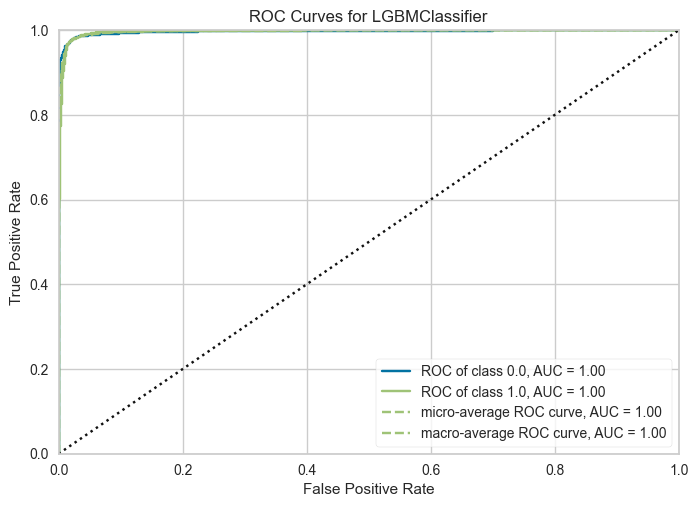

In [20]:
# Plot the model
plot_model(tuned_lightgbm, plot = 'auc')

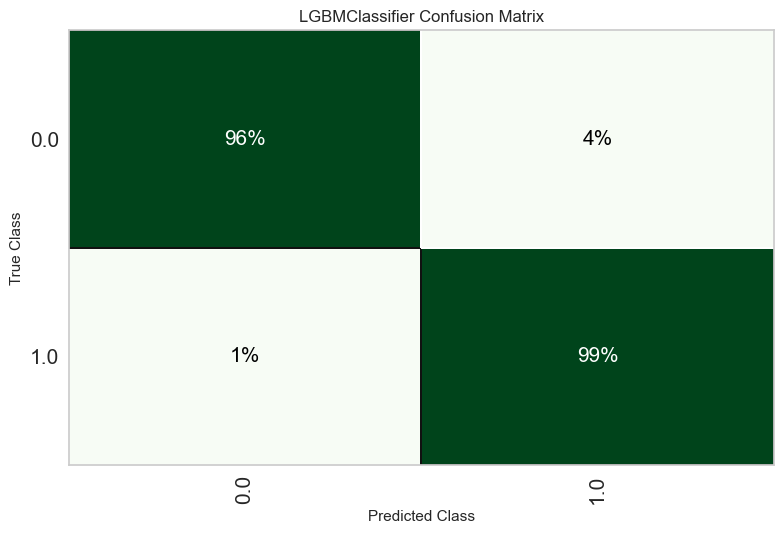

In [28]:
# Plot the confusion matrix with percentage with the test data
plot_model(tuned_lightgbm, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

## Interpret the model

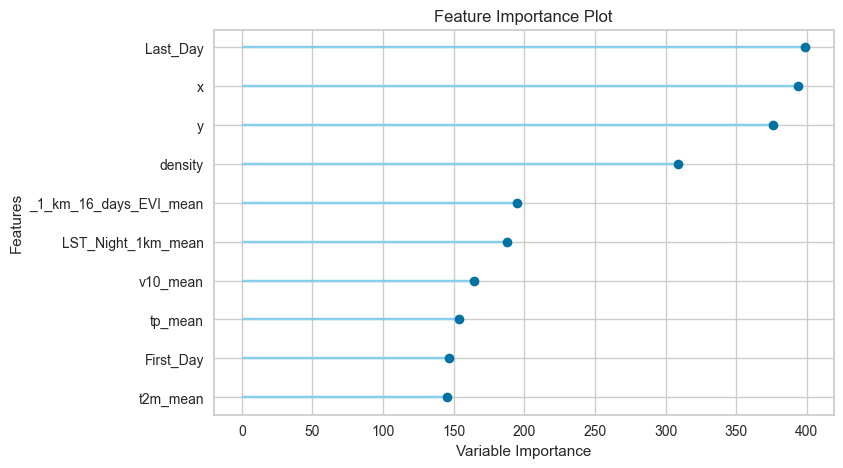

In [29]:
# Plot the feature importance
plot_model(tuned_lightgbm, plot = 'feature')

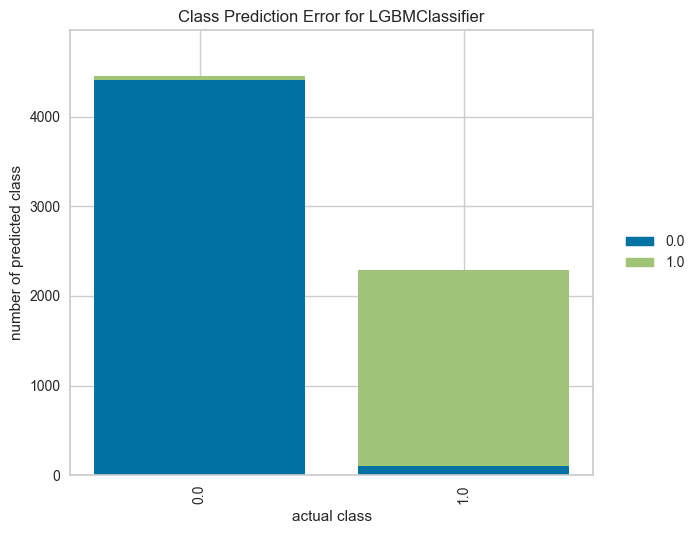

In [27]:
# Plot the shap values
plot_model(tuned_lightgbm, plot = 'error')

In [21]:
# Evaluate the model
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

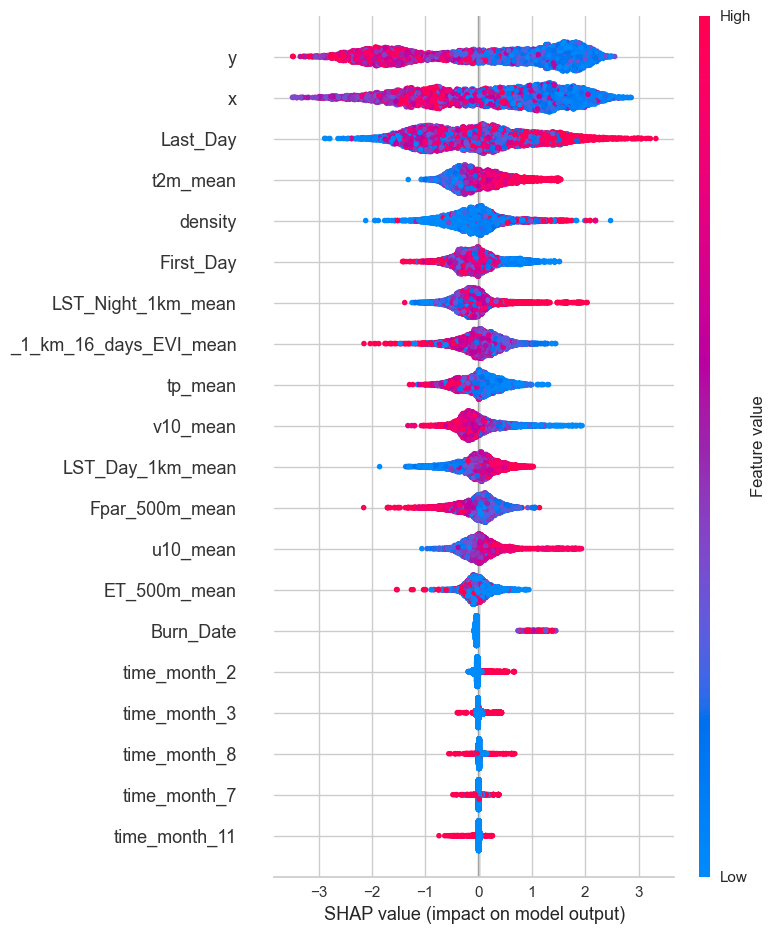

In [30]:
# interpret the model
interpret_model(tuned_lightgbm)

In [32]:
# Predict the model
predict_model(tuned_lightgbm, data=df_test, probability_threshold=0.1)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7680,0.8647,0.6682,0.8348,0.7422,0.5359,0.5469


,x,y,time,density,First_Day,Last_Day,Burn_Date,FireMask,ET_500m_mean,Fpar_500m_mean,u10_mean,v10_mean,t2m_mean,tp_mean,LST_Day_1km_mean,LST_Night_1km_mean,_1_km_16_days_EVI_mean,Label,Score
22558,4.337576,44.430909,2018-08-17,65.063034,207.411290,279.903226,0.0,1.0,16.230000,0.584072,0.419922,-1.000133,293.199289,0.004510,301.407863,289.563687,0.380487,1.0,0.3862
22559,4.337576,44.430909,2018-08-18,65.063034,208.483871,280.709677,0.0,1.0,16.100002,0.585918,0.456385,-1.454020,292.898217,0.004733,301.139173,289.720516,0.382837,1.0,0.2012
22560,4.337576,44.430909,2018-08-19,65.063034,209.556452,281.516129,0.0,1.0,15.850001,0.587551,0.431329,-1.913773,292.856045,0.004273,301.387495,290.000703,0.385432,0.0,0.9032
22561,4.337576,44.430909,2018-08-20,65.063034,210.629032,282.322581,0.0,1.0,15.600000,0.588971,0.459216,-1.988419,293.172901,0.001606,301.535495,290.404703,0.388272,1.0,0.3420
22562,4.337576,44.430909,2018-08-21,65.063034,211.701613,283.129032,0.0,1.0,15.350000,0.590178,0.499901,-2.060565,293.591260,0.001606,301.630000,290.748497,0.391357,1.0,0.2772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29177,6.368977,44.678641,2020-11-09,1.219522,303.233333,330.133333,0.0,0.0,3276.500000,0.210865,-0.744626,-0.512833,274.738078,0.000372,282.273217,272.741976,0.142431,0.0,0.9990
29178,5.308685,43.519256,2020-05-16,62.826794,117.935484,190.032258,0.0,0.0,22.600000,0.600984,-0.620881,0.019610,288.015295,0.002085,296.151572,288.335298,0.364459,0.0,0.9907
29179,4.377214,44.787643,2020-02-13,3.489132,35.017241,87.482759,0.0,0.0,3276.500000,0.407908,1.204479,-0.460502,276.489115,0.000287,279.911783,275.180564,0.192178,1.0,0.8983
29180,5.724875,44.193087,2020-02-05,1.912674,15.413793,77.206897,0.0,0.0,7.139999,0.514080,0.833045,-1.375424,276.273282,0.001132,283.015223,275.484973,0.332222,0.0,0.9984


In [43]:
# Compute the predictions for different probability thresholds and find the one with the highest score of F1
thresholds = np.arange(0.1, 0.9, 0.1)
for i in thresholds:
    predictions = predict_model(tuned_lightgbm, data=df_test, probability_threshold=i)
    print("The F1 score for the probability threshold of {} is {}".format(i, predictions["Score"].mean()))

TypeError: probability_threshold parameter only accepts value between 0 to 1.

In [35]:
# Plot the confusion matrix with percentage with the test data
plot_model(tuned_lightgbm, plot = 'confusion_matrix', plot_kwargs = {'percent' : True}, data=df_test)

TypeError: plot_model() got an unexpected keyword argument 'data'

# Deploy the model

In [31]:
# Finalize the model
final_lightgbm = finalize_model(tuned_lightgbm)

In [32]:
# Save the model
save_model(final_lightgbm, model_name = "final_lightgbm")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='FireMask',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.4,
                                 max_depth=-1, min_child_samples=6,
                                 min_child_weight=0.

In [ ]:
# Load the model
saved_final_lightgbm = load_model("final_lightgbm")